# Importing the libraries 

In [48]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

# Read dataset

In [49]:
SMS=pd.read_csv('spam.csv', encoding='latin-1')
SMS.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [50]:
SMS=SMS.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
SMS=SMS.rename(columns={"v1":"label", "v2":"text"})
SMS.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Exploring the data

In [51]:
print("no. of rows", len(SMS))

no. of rows 5572


# Data pre-processing

In [52]:
SMS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [53]:
SMS.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [54]:
#describe the stats about the data
SMS.describe() 

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [55]:
SMS['length']=SMS['text'].apply(len)
SMS.head()

,label,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


# Plot

<Axes: ylabel='Frequency'>

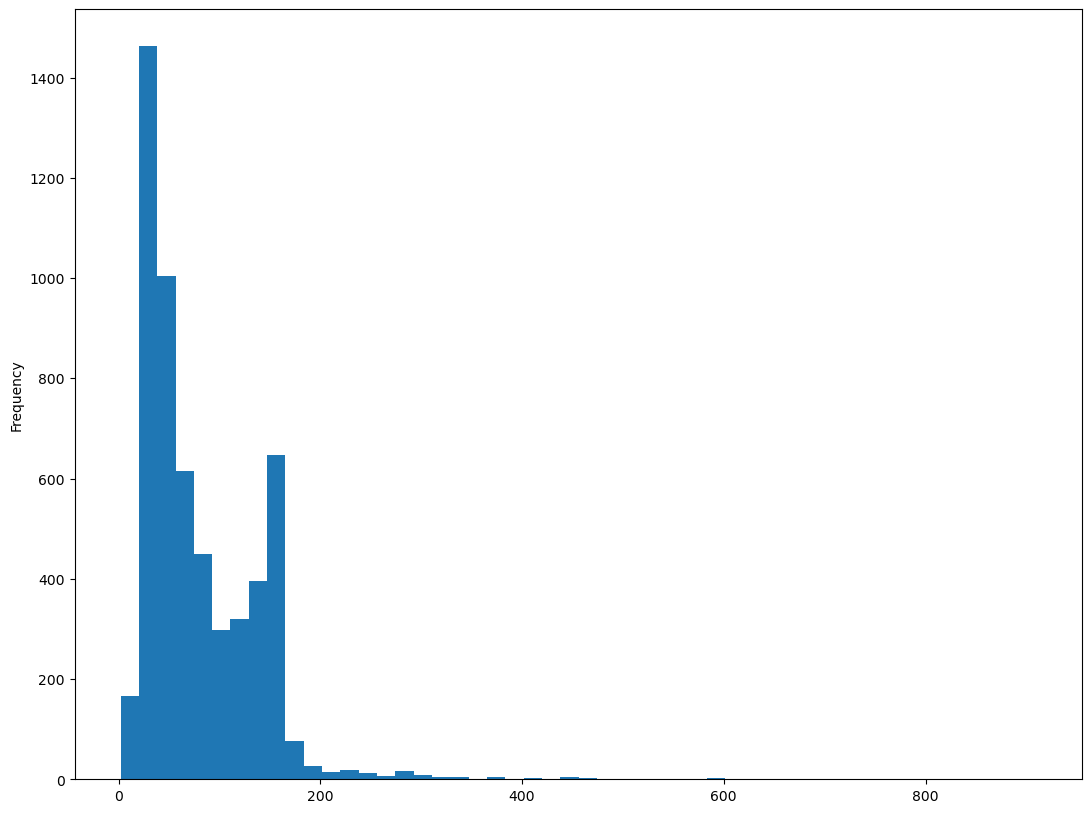

In [56]:
SMS['length'].plot(bins=50, kind='hist', figsize=(13,10))

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

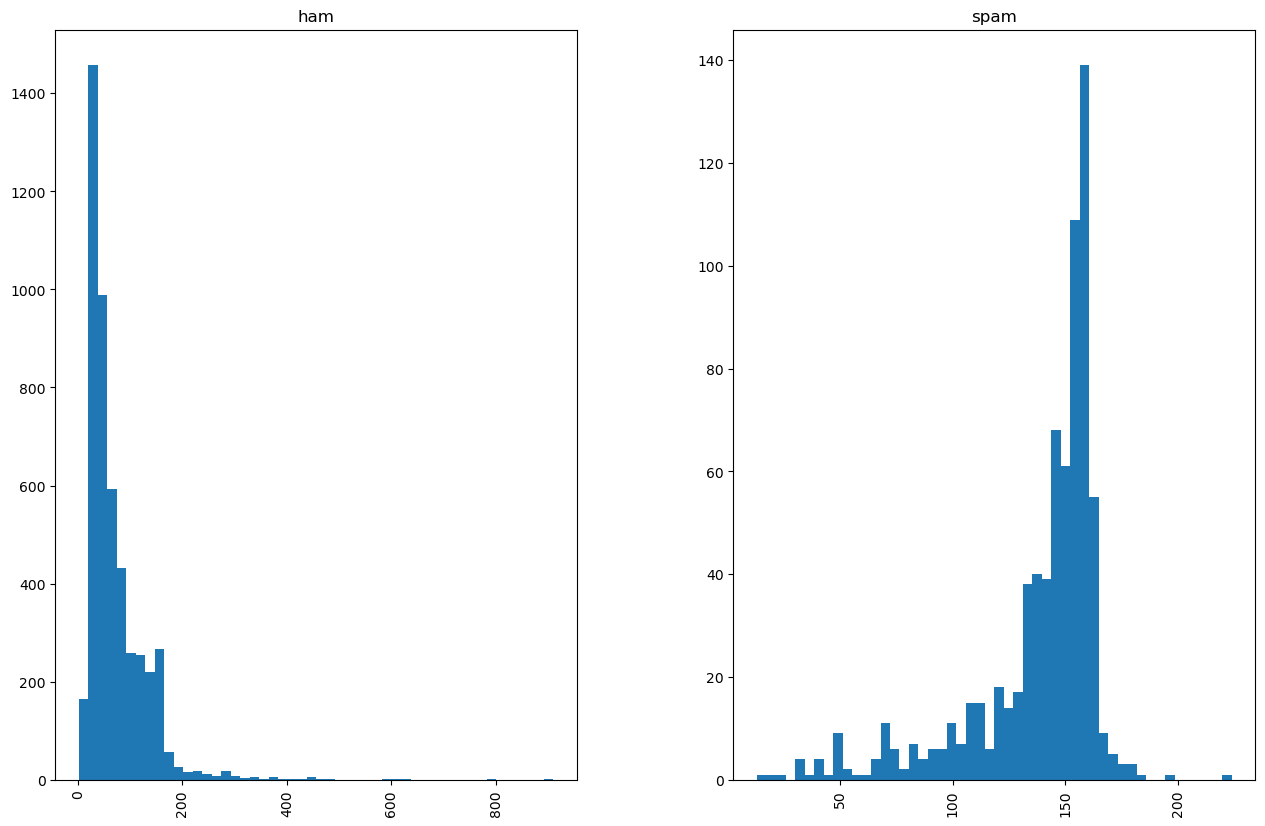

In [57]:
SMS.hist(column='length', by='label', bins=50, figsize=(15,10))

In [58]:
SMS.loc[:,'label']=SMS.label.map({'ham':0, 'spam':1})
SMS.head()

C:\Users\acer\AppData\Local\Temp\ipykernel_9504\3426502672.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  SMS.loc[:,'label']=SMS.label.map({'ham':0, 'spam':1})


,label,text,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [102]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
count=CountVectorizer()
input=['I HAVE A DATE ON SUNDAY WITH WILL!!']
text=count.fit_transform(SMS['text'],input)
x_train, x_test, y_train, y_test= train_test_split(text, SMS['label'], test_size=0.20, random_state=1)
text

<5572x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 73916 stored elements in Compressed Sparse Row format>

In [99]:
print(x_train.shape)
print(x_test.shape)

input=text[5571]

(4457, 8672)
(1115, 8672)


# Implementation of ML Model

In [74]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [75]:
from sklearn.naive_bayes import BernoulliNB
model=BernoulliNB()
model.fit(x_train, y_train)

BernoulliNB()

In [77]:
from sklearn.neural_network import MLPClassifier
model=MLPClassifier()
model.fit(x_train, y_train)

MLPClassifier()

In [76]:
prediction=model.predict(x_test)
print(prediction)

[0 0 0 ... 0 0 0]


In [73]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Multinomial NB")
print("Accuracy score: {}".format(accuracy_score(y_test, prediction)))
print("Precision score: {}".format(precision_score(y_test, prediction)))
print("Recall score: {}".format(recall_score(y_test, prediction)))
print("F1 score: {}".format(f1_score(y_test, prediction)))

Multinomial NB
Accuracy score: 0.97847533632287
Precision score: 0.891156462585034
Recall score: 0.9424460431654677
F1 score: 0.9160839160839161


In [72]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Bernoulli NB")
print("Accuracy score: {}".format(accuracy_score(y_test, prediction)))
print("Precision score: {}".format(precision_score(y_test, prediction)))
print("Recall score: {}".format(recall_score(y_test, prediction)))
print("F1 score: {}".format(f1_score(y_test, prediction)))

Bernoulli NB
Accuracy score: 0.97847533632287
Precision score: 0.891156462585034
Recall score: 0.9424460431654677
F1 score: 0.9160839160839161


In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("MLPClassifier")
print("Accuracy score: {}".format(accuracy_score(y_test, prediction)))
print("Precision score: {}".format(precision_score(y_test, prediction)))
print("Recall score: {}".format(recall_score(y_test, prediction)))
print("F1 score: {}".format(f1_score(y_test, prediction)))

MLPClassifier
Accuracy score: 0.9865470852017937
Precision score: 0.984375
Recall score: 0.9064748201438849
F1 score: 0.9438202247191011


In [100]:
input

<1x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [101]:
model.predict(input)

array([0], dtype=int64)

In [104]:
data=SMS['text']
input="Ok... Ur typical reply..."

In [105]:
data

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5572, dtype: object

In [107]:
data.loc[len(data.index)]="Ok... Ur typical reply..."

In [108]:
data

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
5572                            Ok... Ur typical reply...
Name: text, Length: 5573, dtype: object

In [109]:
text=count.fit_transform(data)

In [110]:
text

<5573x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 73920 stored elements in Compressed Sparse Row format>

In [111]:
input=text[5572]

In [112]:
model.predict(input)

array([0], dtype=int64)